<a href="https://colab.research.google.com/github/mayankdeshmukh/Data-Science-and-Machine-Learning/blob/main/Hierarchical_Clustering_Crime_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Hierarchical Clustering - Crime Data

###Problem Statement - Perform Clustering(Hierarchical) for the crime data and identify the number of clusters formed and draw inferences.

##Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Importing Dataset

In [ ]:
dataset = pd.read_csv("/content/crime_data.csv")

In [ ]:
dataset.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [ ]:
dataset.rename(columns = {'Unnamed: 0':'State'}, inplace = True)

In [ ]:
dataset.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [ ]:
dataset.shape

(50, 5)

In [ ]:
dataset.isnull().sum()

State       0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [ ]:
dataset.isna().sum()

State       0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

###Murder Rate

<Axes: xlabel='State'>

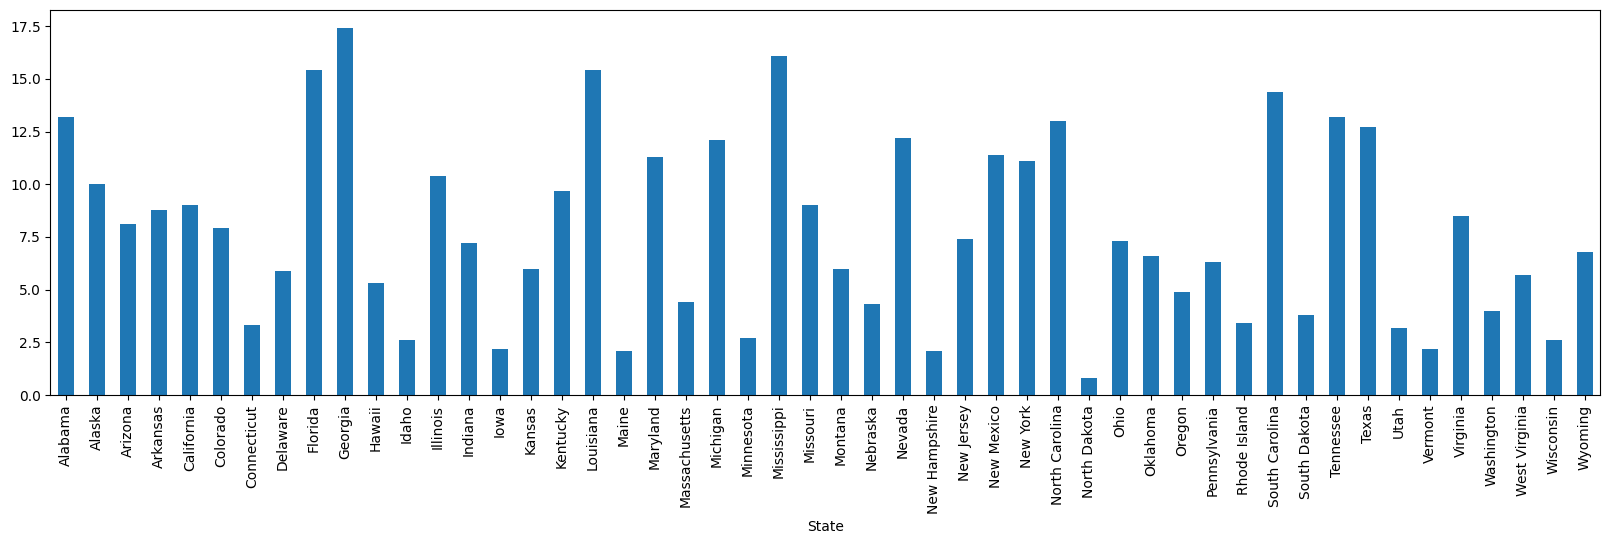

In [ ]:
plt.figure(figsize = (20, 5))
dataset.groupby('State')['Murder'].max().plot(kind='bar')

###Assault Rate

<Axes: xlabel='State'>

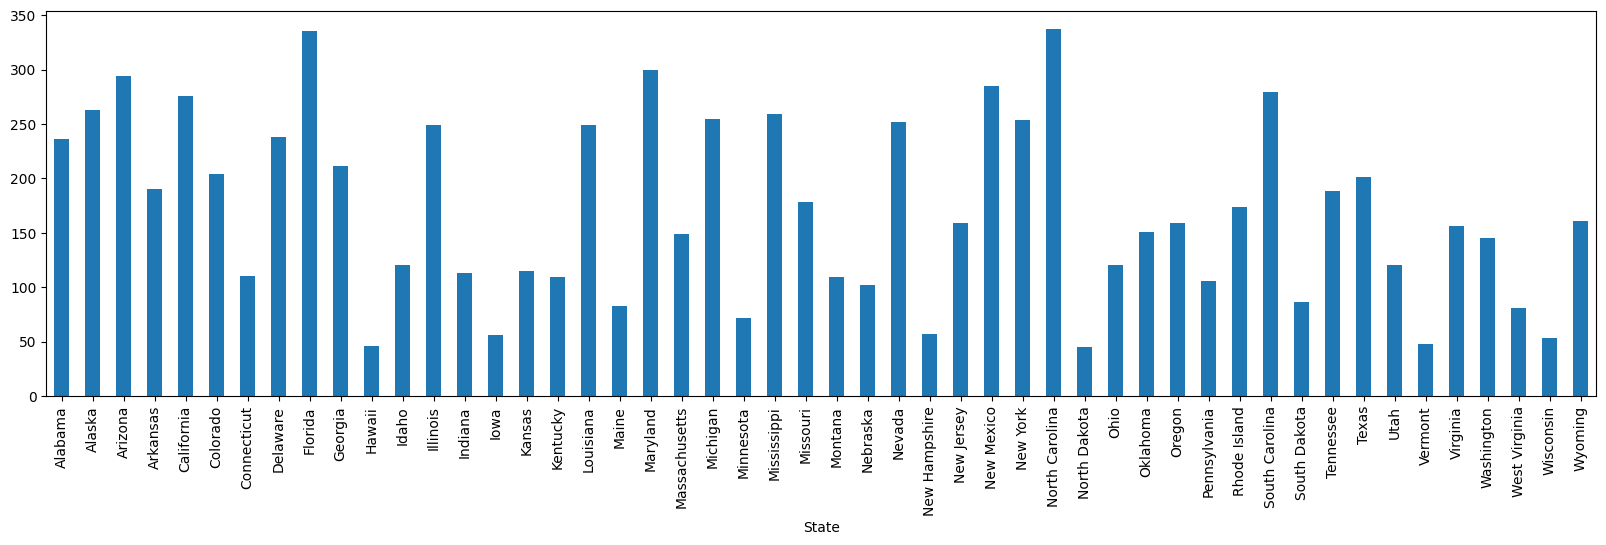

In [ ]:
plt.figure(figsize=(20,5))
dataset.groupby('State')['Assault'].max().plot(kind='bar')

###UrbanPop

<Axes: xlabel='State'>

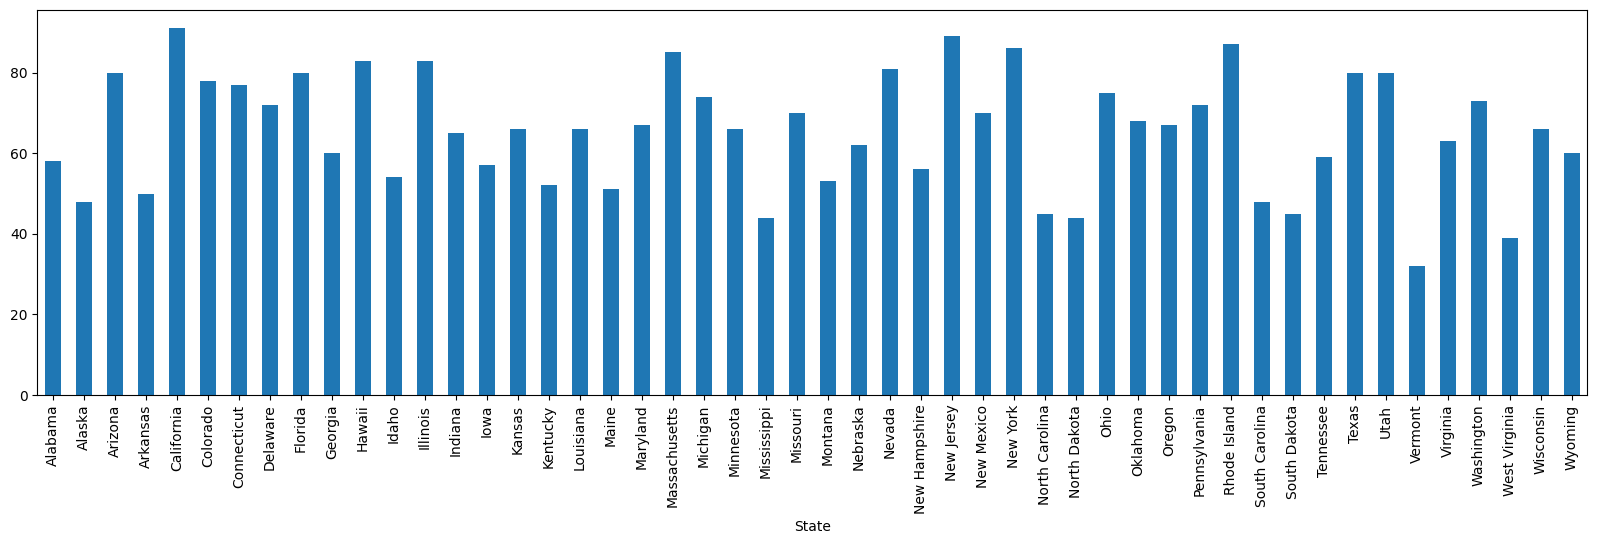

In [ ]:
plt.figure(figsize=(20,5))
dataset.groupby('State')['UrbanPop'].max().plot(kind='bar')

###Rape

<Axes: xlabel='State'>

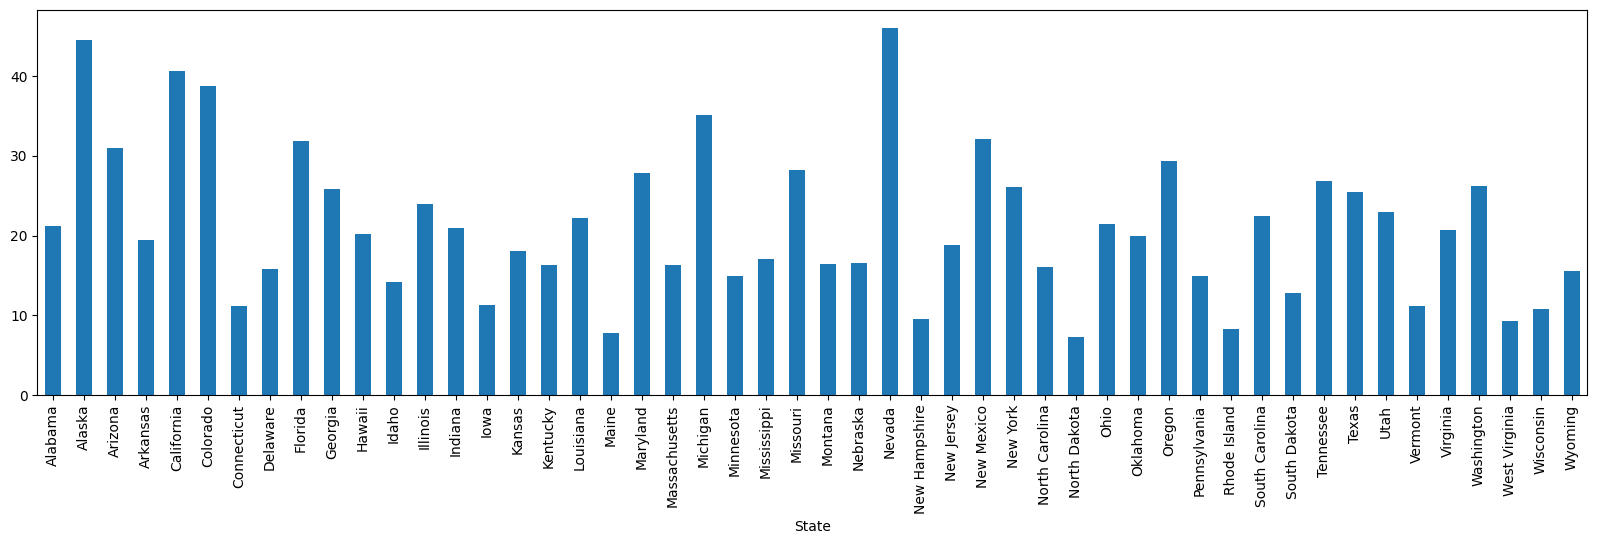

In [ ]:
plt.figure(figsize=(20,5))
dataset.groupby('State')['Rape'].max().plot(kind='bar')

##Independent Variable

In [ ]:
X = dataset.iloc[:, 1:].values

##Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dataset_scaled = scaler.fit_transform(X)

##Machine Learning Algorithm - Hierarchical Clustering

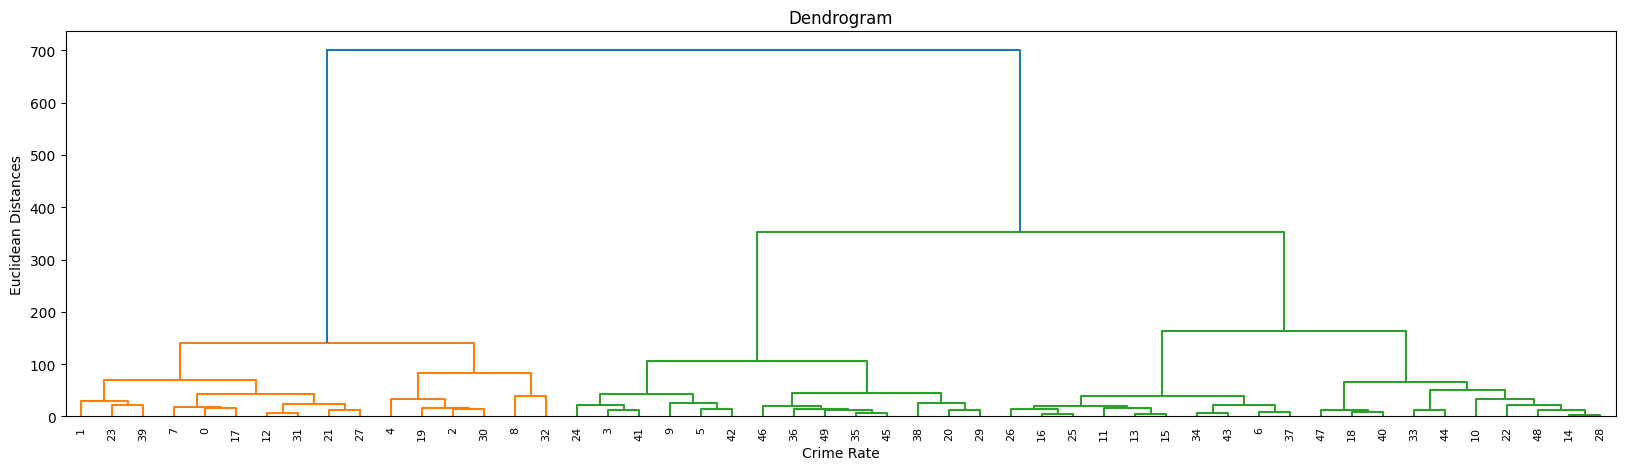

In [ ]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize = (20, 5))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Crime Rate')
plt.ylabel('Euclidean Distances')
plt.show()

In [ ]:
#Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering
AC = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')

In [ ]:
y_pred = AC.fit_predict(X)
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([1, 1, 1, 2, 1, 2, 0, 1, 1, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 2, 1,
       0, 1, 2, 0, 0, 1, 0, 2, 1, 1, 1, 0, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0,
       0, 2, 2, 0, 0, 2])

In [ ]:
dataset['cluster labels'] = y_pred

In [ ]:
dataset[['State', 'cluster labels']]

,State,cluster labels
0,Alabama,1
1,Alaska,1
2,Arizona,1
3,Arkansas,2
4,California,1
5,Colorado,2
6,Connecticut,0
7,Delaware,1
8,Florida,1
9,Georgia,2


<Axes: xlabel='cluster labels', ylabel='Murder'>

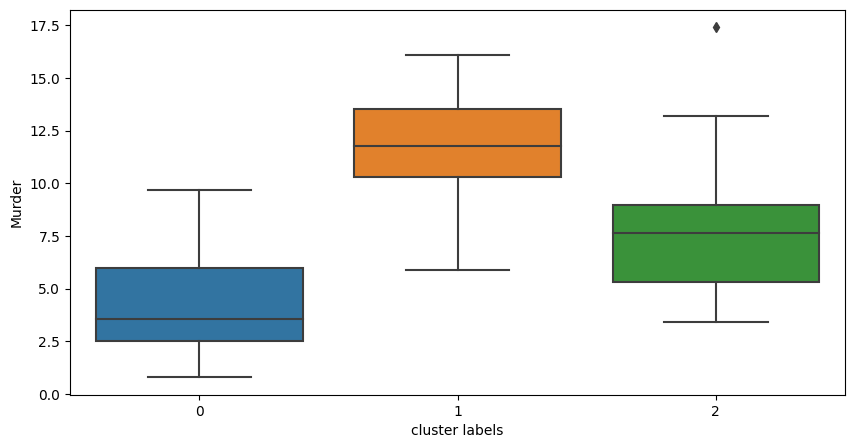

In [ ]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'cluster labels', y = 'Murder', data = dataset)

<Axes: xlabel='cluster labels', ylabel='Assault'>

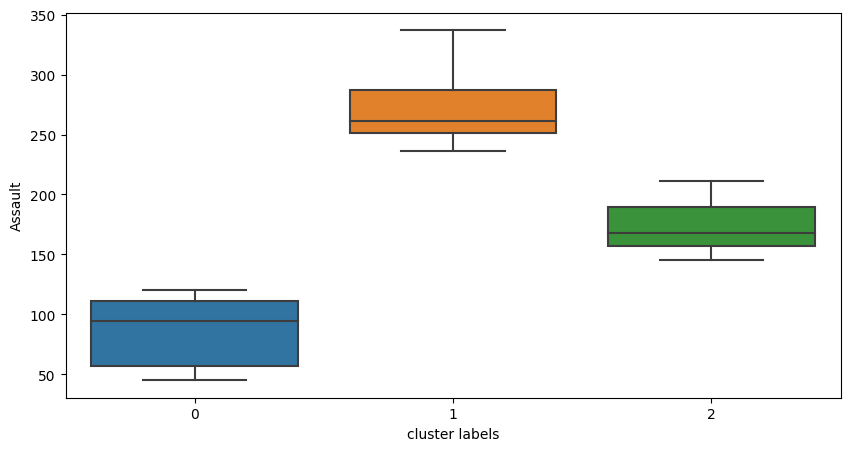

In [ ]:
plt.figure(figsize =(10, 5))
sns.boxplot(x = 'cluster labels', y = 'Assault', data = dataset)

<Axes: xlabel='cluster labels', ylabel='Rape'>

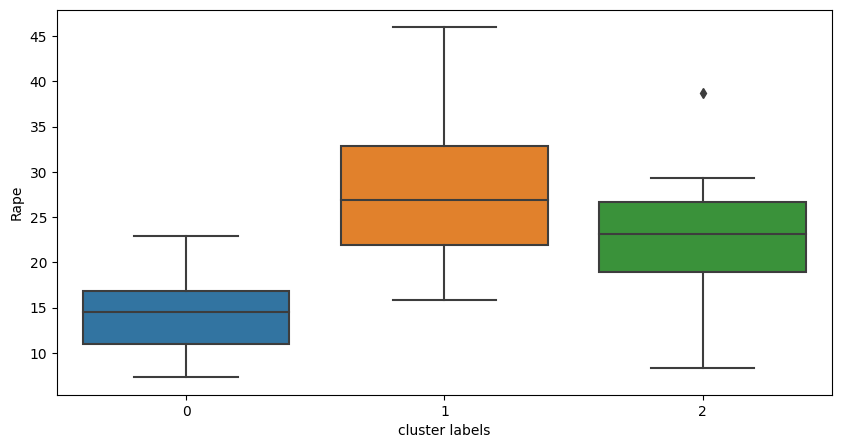

In [ ]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'cluster labels', y = 'Rape', data = dataset)

##Observations

In [ ]:
safe_zone = dataset.groupby('cluster labels')['State'].unique()[0]
safe_zone

array(['Connecticut', 'Hawaii', 'Idaho', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Maine', 'Minnesota', 'Montana', 'Nebraska',
       'New Hampshire', 'North Dakota', 'Ohio', 'Pennsylvania',
       'South Dakota', 'Utah', 'Vermont', 'West Virginia', 'Wisconsin'],
      dtype=object)

In [ ]:
danger_zone = dataset.groupby('cluster labels')['State'].unique()[1]
danger_zone

array(['Alabama', 'Alaska', 'Arizona', 'California', 'Delaware',
       'Florida', 'Illinois', 'Louisiana', 'Maryland', 'Michigan',
       'Mississippi', 'Nevada', 'New Mexico', 'New York',
       'North Carolina', 'South Carolina'], dtype=object)

In [ ]:
moderate_zone = dataset.groupby('cluster labels')['State'].unique()[2]
moderate_zone

array(['Arkansas', 'Colorado', 'Georgia', 'Massachusetts', 'Missouri',
       'New Jersey', 'Oklahoma', 'Oregon', 'Rhode Island', 'Tennessee',
       'Texas', 'Virginia', 'Washington', 'Wyoming'], dtype=object)

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(dataset[y_pred==0, 0], dataset[y_pred==0, 1], s=100, c='red', label ='Safe_Zone')
plt.scatter(dataset[y_pred==1, 0], dataset[y_pred==1, 1], s=100, c='blue', label ='Danger_Zone')
plt.scatter(dataset[y_pred==2, 0], dataset[y_pred==2, 1], s=100, c='green', label ='Moderate_Zone')
plt.legend()
plt.show()

InvalidIndexError: ignored

<Figure size 1000x500 with 0 Axes>